### Code for Chapter 4, Section 4.3: Error of Convergence

Import some important libraries.

In [3]:
import numpy as np
import numexpr as ne
import matplotlib.pyplot as plt
from scipy import integrate
import time
import pyfftw
%matplotlib inline

Hard-coded some values, e.g. the dt's for each resolution and their corresponding it's.

In [5]:
# define the values used for the runs.
L = 6.
C0 = 0.0015/(L/64)**2

dt1024 = 5e-6
it1024 = int(1./dt1024)+1

dt512 = C0*(L/512)**2
it512 = int(1./dt512)+1

dt256 = C0*(L/256)**2
it256 = int(1./dt256)+1

dt128 = C0*(L/128)**2
it128 = int(1./dt128)+1

dt64 = C0*(L/64)**2
it64 = int(1./dt64)+1

sigma = 0.5
m = 0.33

# load the arrays.
path = 'uArrs/'
# uArr2048 = np.loadtxt('uArray-dt=%s,it=%s,Nx=%s.txt' %(dt2048,it2048,2048))
uArr1024 = np.loadtxt(path+'uArray-dt=%s,it=%s,Nx=%s,sigma=%s,m=%s.txt' %(dt1024,it1024,1024,sigma,m))
uArr512 = np.loadtxt(path+'uArray-dt=%s,it=%s,Nx=%s,sigma=%s,m=%s.txt' %(dt512,it512,512,sigma,m))
uArr256 = np.loadtxt(path+'uArray-dt=%s,it=%s,Nx=%s,sigma=%s,m=%s.txt' %(dt256,it256,256,sigma,m))
uArr128 = np.loadtxt(path+'uArray-dt=%s,it=%s,Nx=%s,sigma=%s,m=%s.txt' %(dt128,it128,128,sigma,m))
uArr64 = np.loadtxt(path+'uArray-dt=%s,it=%s,Nx=%s,sigma=%s,m=%s.txt' %(dt64,it64,64,sigma,m))

The error across resolution is calculated by averaging the higher resolution grid in strides of `binSize`. E.g. in the above case, it is $(2 \times 2)$.

In [8]:
def gridBinAvg(grid,binSize):
    # bin size in 1D (Binsize=4 is 2 x 2)
    bin1DSize = binSize/2
    
    # get size of the averaged grid (half of grid size)
    avgGridSize = grid.shape[0]/bin1DSize

    # initialize averaged grid.
    avgGrid = np.zeros((avgGridSize,avgGridSize))

    # get top-left coordinate of each bin.
    Ls = range(0,grid.shape[0],bin1DSize)

    # get 2 x 2 bins and average over them. Store this in the averaged grid
    yAvgGrid = 0
    for yGrid in Ls:
        xAvgGrid = 0
        for xGrid in Ls:
            avg = (grid[xGrid,yGrid]+grid[xGrid+1,yGrid]+grid[xGrid,yGrid+1]+grid[xGrid+1,yGrid+1])/float(binSize)
            avgGrid[xAvgGrid,yAvgGrid] = avg
            xAvgGrid += 1
        yAvgGrid += 1
    return avgGrid

uArr1024_512 = gridBinAvg(uArr1024,4)
uArr512_256 = gridBinAvg(uArr1024_512,4)
uArr256_128 = gridBinAvg(uArr512_256,4)
uArr128_64 = gridBinAvg(uArr256_128,4)

Calculate the $l_2$ and $\log(l_2)$-errors, where
$$ l_2(err) = \sqrt{\frac{1}{N_x^2} \sum_{i,j}^{N_x} (u^{exact}_{i,j} - u^{N_x}_{i,j})^2}. $$

In [41]:
print("l2-errors:")

n = 2.
a = 1.
err0 = a*(((1./512)**n)*np.sum((uArr1024_512-uArr512)**2))**0.5
err1 = a*(((1./256)**n)*np.sum((uArr512_256-uArr256)**2))**0.5
err2 = a*(((1./128)**n)*np.sum((uArr256_128-uArr128)**2))**0.5
err3 = a*(((1./64)**n)*np.sum((uArr128_64-uArr64)**2))**0.5

print(err0)
print(err1)
print(err2)
print(err3)

print("log(l2-errors):")

logerr0 = np.log2(err1/err0)
logerr1 = np.log2(err2/err1)
logerr2 = np.log2(err3/err2)

print(logerr0)
print(logerr1)
print(logerr2)

l2-errors:
0.00429705394649
0.0129916029002
0.0308201939713
0.0685070126325
log(l2-errors):
1.5961596467
1.24629650063
1.15237573357


Since the EOC's are reduced, we want to find where the errors accummulate. Plot the errors, where
$$ err(N_x) = \lvert u_{exact} - u_{N_x} \rvert^2. $$

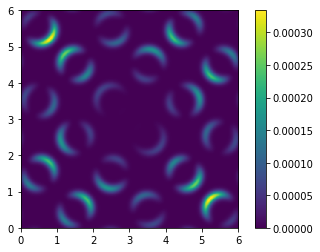

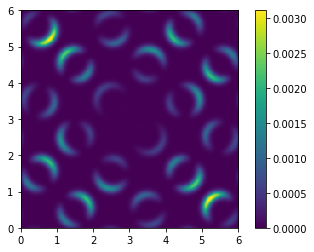

In [16]:
plt.imshow((uArr1024_512-uArr512)**2,origin='left', extent=[0,L,0,L])
plt.colorbar()
plt.show()

plt.imshow((uArr512_256-uArr256)**2,origin='left', extent=[0,L,0,L])
plt.colorbar()
plt.show()